# Preprocesses the data of forecast_btc.

Things to consider:

* Are all the data points useful?
- Are all the features useful?
* Should the data be rescaled?
- Is the current time window relevant?
* How should the data be saved 

Ignoring all that though, the first step is aquiring and working on the data

In [1]:
# imports

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import pandas as pd

In [2]:
# getting the data and a quick glimpse

data = pd.read_csv("data/coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv")

display(data.head(), data.shape, data.describe())

print(f"Datatypes of dataset:\n {data.dtypes}")

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(2099760, 8)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,2.099760e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06
mean,1.483899e+09,3.246403e+03,3.247829e+03,3.244856e+03,3.246403e+03,7.849139e+00,3.600157e+04,3.246341e+03
std,3.638214e+07,3.799154e+03,3.801394e+03,3.796761e+03,3.799150e+03,1.873222e+01,1.401879e+05,3.799078e+03
min,1.417412e+09,6.000000e-02,6.000000e-02,6.000000e-02,6.000000e-02,1.000000e-08,2.641700e-06,6.000000e-02
25%,1.452410e+09,4.195800e+02,4.196400e+02,4.195000e+02,4.195700e+02,9.024000e-01,6.440031e+02,4.195645e+02
50%,1.483906e+09,1.014580e+03,1.014890e+03,1.014150e+03,1.014530e+03,2.692900e+00,3.695642e+03,1.014512e+03
75%,1.515402e+09,6.322630e+03,6.324010e+03,6.321090e+03,6.322670e+03,7.600965e+00,1.972392e+04,6.322550e+03
max,1.546899e+09,1.989199e+04,1.989199e+04,1.989198e+04,1.989199e+04,1.563267e+03,1.997076e+07,1.989199e+04


Datatypes of dataset:
 Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object


* Let's see if we need to remove any unnecessary columns

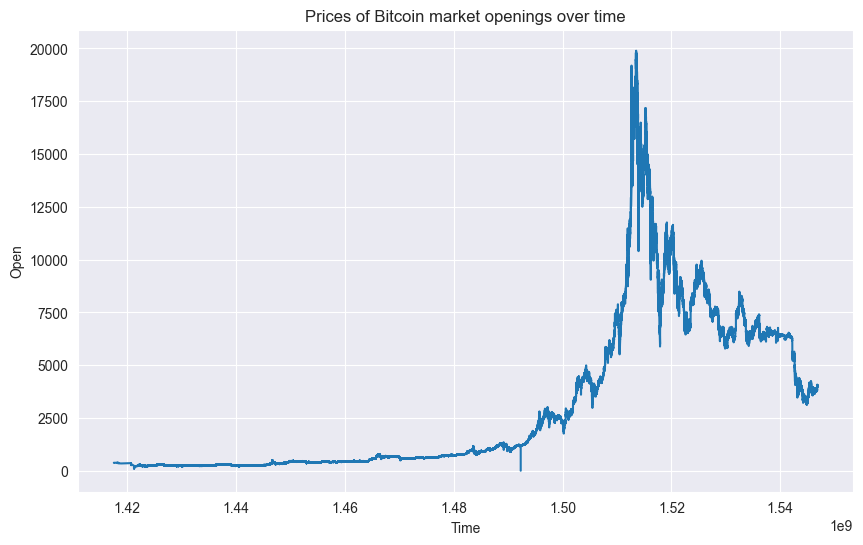

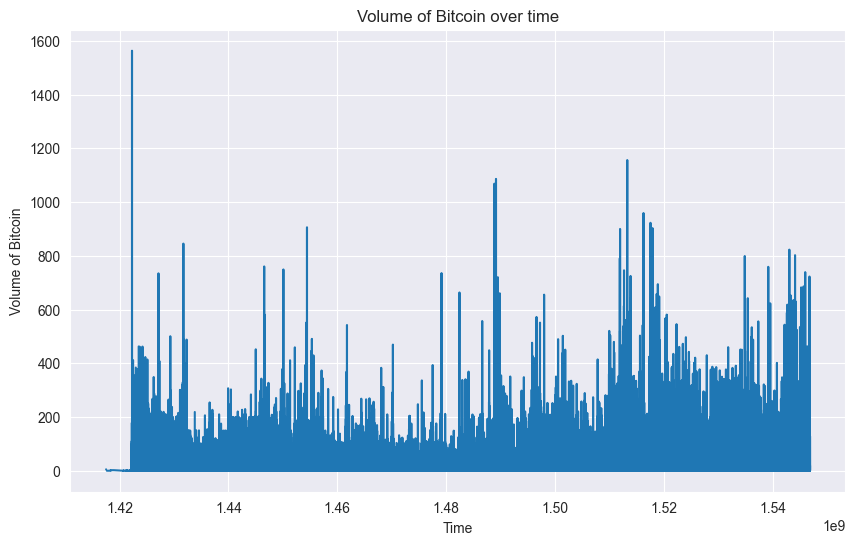

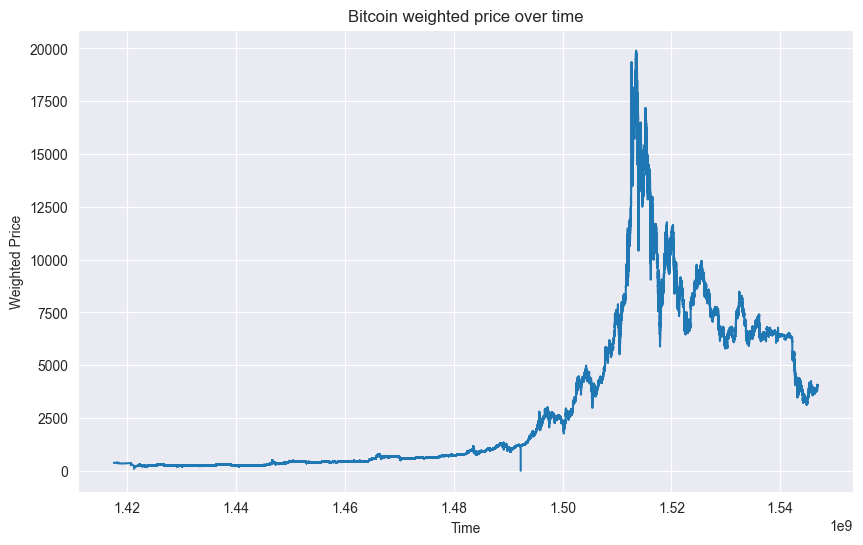

In [3]:
# To do this we need to visualize the dataset and see what is redundand

# Open column visualization
plt.figure(figsize=(10, 6))
plt.plot(data["Timestamp"], data["Open"])
plt.xlabel("Time")
plt.ylabel("Open")
plt.title("Prices of Bitcoin market openings over time")
plt.grid(True)
plt.show()

# Volume(BTC) visualization
plt.figure(figsize=(10, 6))
plt.plot(data["Timestamp"], data["Volume_(BTC)"])
plt.xlabel("Time")
plt.ylabel("Volume of Bitcoin")
plt.title("Volume of Bitcoin over time")
plt.grid(True)
plt.show()

# Weighted price visualization
plt.figure(figsize=(10, 6))
plt.plot(data["Timestamp"], data["Weighted_Price"])
plt.xlabel("Time")
plt.ylabel("Weighted Price")
plt.title("Bitcoin weighted price over time")
plt.grid(True)
plt.show()

### Weighted price and Open prices are very similar as they tend to hold a correlation with each-other

It would be wise to remove the weighted price column as it is not necessary for this analysis.

In [4]:
# Getting rid of weighted_price

data.drop("Weighted_Price", axis="columns", inplace=True)

data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency)
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN


### A lot of missing data it seems...

And we have a ton of data in general, so we can either delete the missing values,
or fill them.
I think filling them is the play here as there is a ton of data there

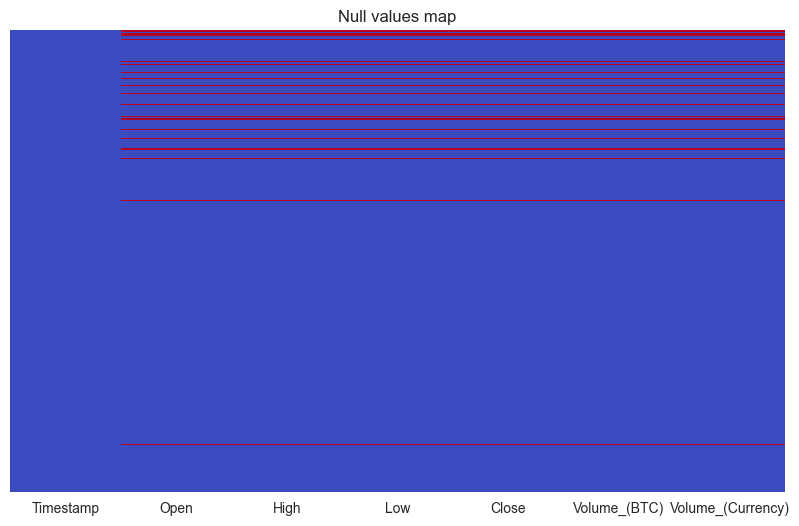

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="coolwarm", yticklabels=False)
plt.title("Null values map")
plt.show()

In [10]:
# "Handling" the missing values

print(data.isnull().sum())

data = data.dropna()

print("\nMissing Values Afterwards:\n", data.isnull().sum())

Timestamp                 0
Open                 109069
High                 109069
Low                  109069
Close                109069
Volume_(BTC)         109069
Volume_(Currency)    109069
dtype: int64

Missing Values Afterwards:
 Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
dtype: int64


### Clean up on isle 3

Next up would be the splitting of the data into train, test and val

70% for train
20% for val
10% for test

Using the sklearn train/test/split thingy

In [17]:
from sklearn.model_selection import train_test_split

train_split = 0.7
val_split = 0.2
test_split = 0.1

train_data, remaining = train_test_split(data, test_size=1 - train_split, random_state=42)

val_data, test_data = train_test_split(remaining, test_size=val_split, random_state=42)

print("Training Data shape:\n", train_data.shape)
print("Validation Data shape:\n", val_data.shape)
print("Test Data shape:\n", test_data.shape)

Training Data shape:
 (1393483, 7)
Validation Data shape:
 (477766, 7)
Test Data shape:
 (119442, 7)


 Checking the distribution of the data split.

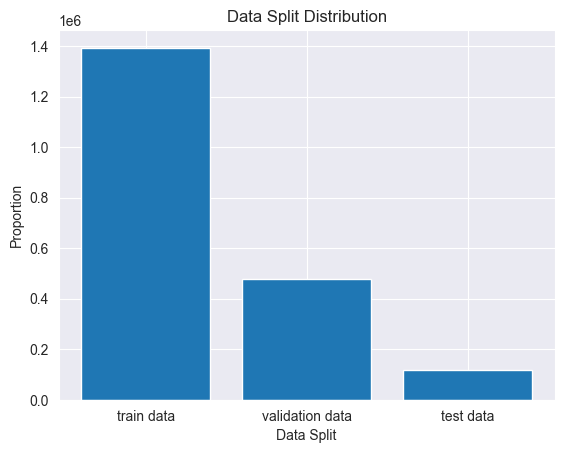

In [18]:
labels = ["train data", "validation data", "test data"]
values = [train_data.shape[0], val_data.shape[0], test_data.shape[0]]

plt.bar(labels, values)
plt.xlabel("Data Split")
plt.ylabel("Proportion")
plt.title("Data Split Distribution")
plt.show()

Looks Good!
About a 70/20/10 split indeed

* Next on the chopping block is the normalization for the data

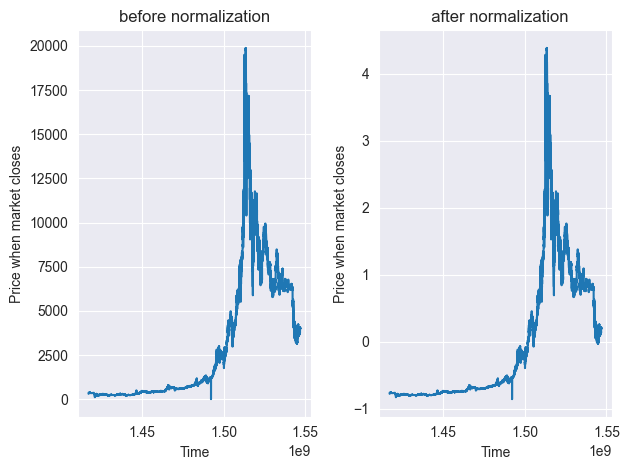

In [20]:
# Plotting timestamp of close before
plt.subplot(1, 2, 1)
plt.plot(data["Timestamp"], data["Close"])
plt.xlabel("Time")
plt.ylabel("Price when market closes")
plt.title("before normalization")

# close after normalization
train_mean = train_data["Close"].mean()
train_std = train_data["Close"].std()
plt.subplot(1, 2, 2)
plt.plot(data["Timestamp"], (data["Close"] - train_mean) / train_std)
plt.xlabel("Time")
plt.ylabel("Price when market closes")
plt.title("  after normalization")

plt.tight_layout()

In [21]:
# calculation of mean and standard deviation of train data

train_mean = train_data.mean()
train_std = train_data.std()

# normalizing the train data
train_data = (val_data - train_mean) / train_std

# normalizing the val data using the training data
val_data = (val_data - train_mean) / train_std

# normalizing the testing data using the training data
test_data = (test_data - train_mean) / train_std

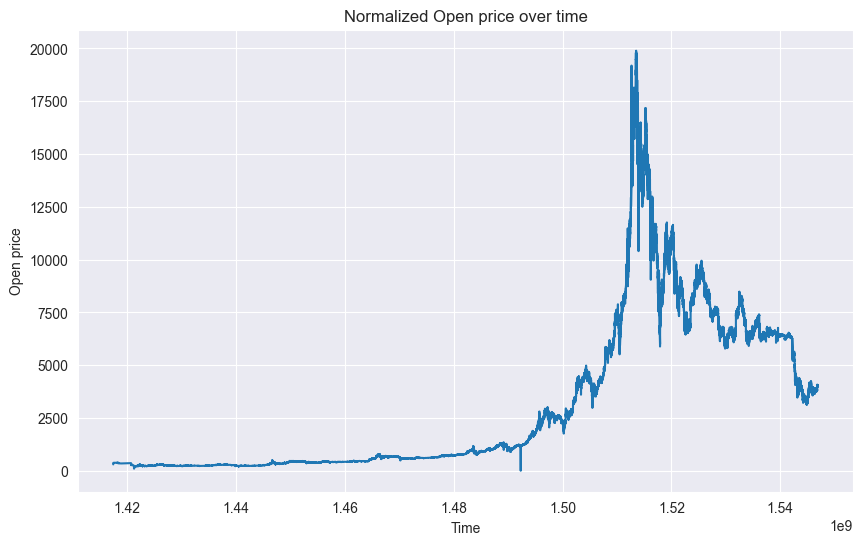

In [22]:
# visualize the preprocessed data

plt.figure(figsize=(10, 6))
plt.plot(data["Timestamp"], data["Open"])
plt.xlabel("Time")
plt.ylabel("Open price")
plt.title("Normalized Open price over time")
plt.show()